In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [136]:
def graph(title, xlabel, ylabel, save=False, legend=True, tight=True):
    plt.title(title, fontsize=18)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.grid(True)

    if legend: plt.legend()
    if tight: plt.tight_layout()

    if save: plt.savefig(save)
    plt.show()

# 1.1

In [267]:
# f(s) is the neurons activation function
# s is the total input to the neuron
def f(s):
    return 60 * (1 + np.tanh(s))

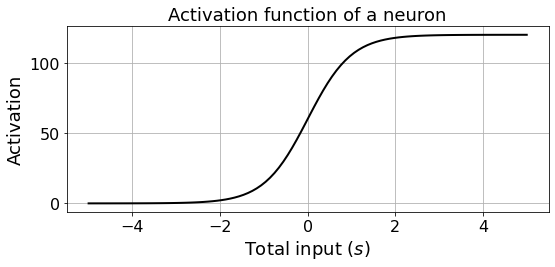

In [313]:
# plot for a suitable range of s
s = np.linspace(-5, 5, 100)

plt.figure(figsize=(8, 4))
plt.plot(s, f(s), linewidth=2, color='k')

graph(
    'Activation function of a neuron',
    r'Total input ($s$)', 
    r'Activation',
    '11.pdf',
    legend=False
)

# 1.2

In [17]:
# T: total # of time steps
# r0: initial condition
# dt: size of time step
# w: connection weight
# I: constant input
# sig: noise coefficient

def euler(T, r0, dt, w, I, sig=0):
    D = np.zeros(T)
    R = np.zeros(T)
    R[0] = r0

    for t in range(0, T-1):
        activation = f(w * R[t] + I)
        noise = np.random.normal(0, 1) * sig
        D[t] = (activation + noise - R[t])
        R[t+1] = R[t] + D[t] * dt
    
    return D, R

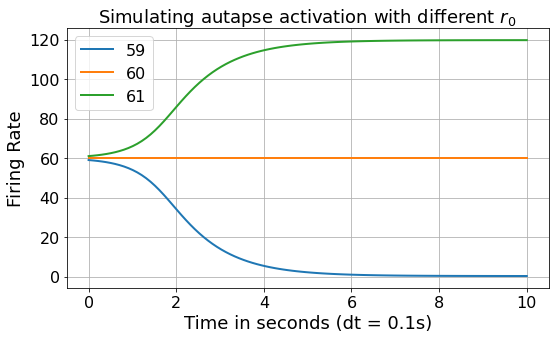

In [297]:
T = 100
dt = 0.1

x = np.linspace(0, T * dt, T)
plt.figure(figsize=(8, 5))

_, y = euler(T, 59, dt, 0.05, -3)
plt.plot(x, y, linewidth=2, label='59')

_, y = euler(T, 60, dt, 0.05, -3)
plt.plot(x, y, linewidth=2, label='60')

_, y  = euler(T, 61, dt, 0.05, -3)
plt.plot(x, y, linewidth=2, label='61')

graph(
    r'Simulating autapse activation with different $r_0$',
    'Time in seconds (dt = 0.1s)',
    'Firing Rate',
    '12.pdf'
)

# 1.3

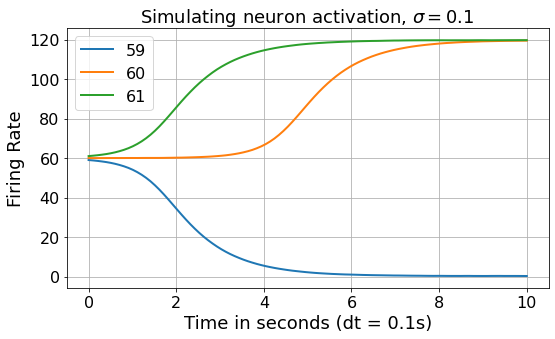

In [298]:
T = 100
dt = 0.1

x = np.linspace(0, T * dt, T)
plt.figure(figsize=(8, 5))

_, y = euler(T, 59, dt, 0.05, -3, 0.1)
plt.plot(x, y, linewidth=2, label='59')

_, y = euler(T, 60, dt, 0.05, -3, 0.1)
plt.plot(x, y, linewidth=2, label='60')

_, y = euler(T, 61, dt, 0.05, -3, 0.1)
plt.plot(x, y, linewidth=2, label='61')

graph(
    r'Simulating neuron activation, $\sigma = 0.1$',
    'Time in seconds (dt = 0.1s)',
    'Firing Rate',
    '13_1.pdf'
)

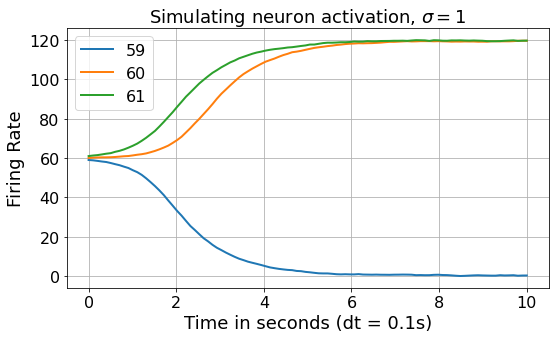

In [299]:
T = 100
dt = 0.1

x = np.linspace(0, T * dt, T)
plt.figure(figsize=(8, 5))

_, y = euler(T, 59, dt, 0.05, -3, 1)
plt.plot(x, y, linewidth=2, label='59')

_, y = euler(T, 60, dt, 0.05, -3, 1)
plt.plot(x, y, linewidth=2, label='60')

_, y = euler(T, 61, dt, 0.05, -3, 1)
plt.plot(x, y, linewidth=2, label='61')

graph(
    r'Simulating neuron activation, $\sigma = 1$',
    'Time in seconds (dt = 0.1s)',
    'Firing Rate',
    '13_2.pdf'
)

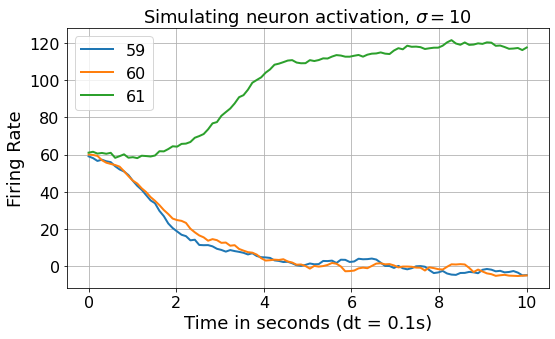

In [295]:
T = 100
dt = 0.1

x = np.linspace(0, T * dt, T)
plt.figure(figsize=(8, 5))

_, y = euler(T, 59, dt, 0.05, -3, 10)
plt.plot(x, y, linewidth=2, label='59')

_, y = euler(T, 60, dt, 0.05, -3, 10)
plt.plot(x, y, linewidth=2, label='60')

_, y = euler(T, 61, dt, 0.05, -3, 10)
plt.plot(x, y, linewidth=2, label='61')

graph(
    r'Simulating neuron activation, $\sigma = 10$',
    'Time in seconds (dt = 0.1s)',
    'Firing Rate',
    '13_3.pdf'
)

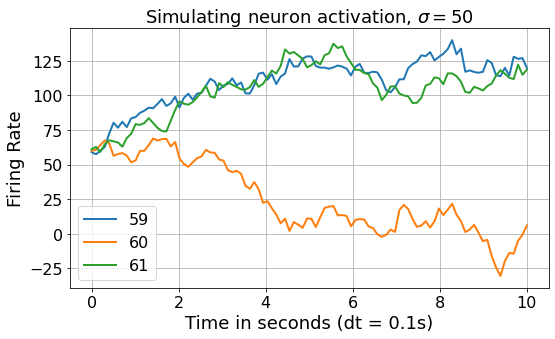

In [296]:
T = 100
dt = 0.1

x = np.linspace(0, T * dt, T)
plt.figure(figsize=(8, 5))

_, y = euler(T, 59, dt, 0.05, -3, 50)
plt.plot(x, y, linewidth=2, label='59')

_, y = euler(T, 60, dt, 0.05, -3, 50)
plt.plot(x, y, linewidth=2, label='60')

_, y = euler(T, 61, dt, 0.05, -3, 50)
plt.plot(x, y, linewidth=2, label='61')

graph(
    r'Simulating neuron activation, $\sigma = 50$',
    'Time in seconds (dt = 0.1s)',
    'Firing Rate',
    '13_4.pdf'
)

# 1.4

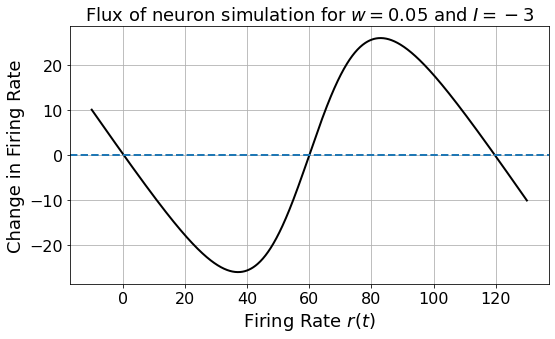

In [339]:
def drt(r, w, I):
    return -r + (60 * (1 + np.tanh(w * r + I)))

x = np.linspace(-10, 130, 1000)
w = 0.05
I = -3

plt.figure(figsize=(8, 5))
plt.plot(x, drt(x, w, I), linewidth=2, color='k')
plt.axhline(0, linewidth=2, linestyle='--')
graph(
    rf'Flux of neuron simulation for $w={w}$ and $I={I}$',
    r'Firing Rate $r(t)$',
    r'Change in Firing Rate',
    '14_2.pdf',
    legend=False
)


# 1.5

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [3. 3. 3. ... 1. 1. 1.]
 [3. 3. 3. ... 1. 1. 1.]
 [3. 3. 3. ... 1. 1. 1.]]


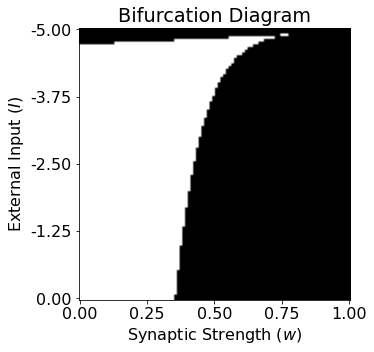

In [347]:
B = np.zeros((100,100))
Ws = np.linspace(0, 1, 100)
Is = np.linspace(-5, 0, 100)
r = np.linspace(0, 120, 1000)

for j, I in enumerate(Is):
    for i, w in enumerate(Ws):
        flux = drt(r, w, I)
        signs = np.sign(flux)
        B[i, j] = np.sum(signs[1:] != signs[:-1])

plt.figure(figsize=(6,5))
plt.imshow(B, cmap='grey')
plt.title('Bifurcation Diagram')
plt.xlabel(r'Synaptic Strength $(w)$')
plt.ylabel(r'External Input $(I)$')
plt.xticks(np.linspace(0, len(Ws) - 1, 5), ["{:.2f}".format(w) for w in np.linspace(0, 1, 5)])  # Set xticks with custom labels
plt.yticks(np.linspace(0, len(Is) - 1, 5), ["{:.2f}".format(I) for I in np.linspace(-5, 0, 5)])  # Set yticks with custom labels
plt.savefig('15.pdf')
plt.show()


# 2.1 & 2.2

In [134]:
def mutual(T, dt, x0, y0, w, I):
    Dx = np.zeros(T)
    Dy = np.zeros(T)
    Fx = np.zeros(T)
    Fy = np.zeros(T)
    Fx[0], Fy[0] = x0, y0

    for t in range(0, T-1):
        # activation for neuron x
        s = w * Fy[t] + I
        f = 50 / (1 + np.exp(-s))
        Dx[t] = -Fx[t] + f
        Fx[t+1] = Fx[t] + (Dx[t] * dt)

        # activation for neuron y
        s = w * Fx[t] + I
        f = 50 / (1 + np.exp(-s))
        Dy[t] = -Fy[t] + f
        Fy[t+1] = Fy[t] + (Dy[t] * dt)

    return Dx, Dy, Fx, Fy
    

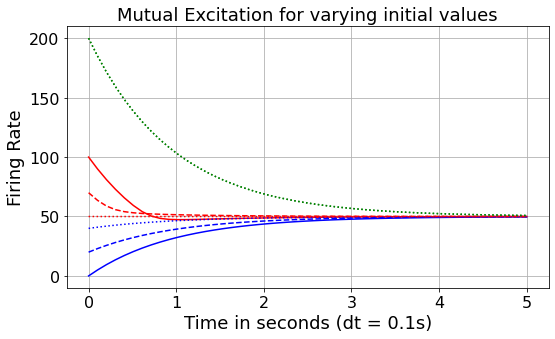

In [394]:
T = 50
dt = 0.1
w = 0.4
I = -10

x = np.linspace(0, T * dt, T)
plt.figure(figsize=(8, 5))


x0 = 0
y0 = 100
_, _, Fx, Fy = mutual(T, dt, x0, y0, w, I)
plt.plot(x, Fx, label=rf'$x_0 = {x0}$', color='b')
plt.plot(x, Fy, label=rf'$y_0 = {y0}$', color='r')

x0 = 20
y0 = 70
_, _, Fx, Fy = mutual(T, dt, x0, y0, w, I)
plt.plot(x, Fx, label=rf'$x_0 = {x0}$',  color='b', linestyle='--')
plt.plot(x, Fy, label=rf'$y_0 = {y0}$',  color='r', linestyle='--')

x0 = 40
y0 = 50
_, _, Fx, Fy = mutual(T, dt, x0, y0, w, I)
plt.plot(x, Fx, label=rf'$x_0 = {x0}$',  color='b', linestyle=':')
plt.plot(x, Fy, label=rf'$y_0 = {y0}$',  color='r', linestyle=':')

x0 = 200
y0 = 200
_, _, Fx, Fy = mutual(T, dt, x0, y0, w, I)
plt.plot(x, Fx, label=rf'$x_0 = {x0}$',  color='g', linestyle=':')
plt.plot(x, Fy, label=rf'$y_0 = {y0}$',  color='g', linestyle=':')

graph(
    rf'Mutual Excitation for varying initial values',
    'Time in seconds (dt = 0.1s)',
    'Firing Rate',
    '21_1.pdf',
    legend=False
)

# 2.2 

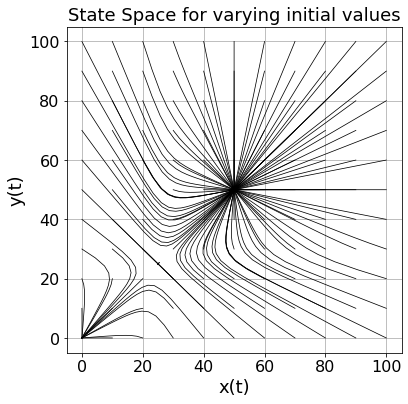

In [450]:
T = 100
dt = 0.1
w = 0.4
I = -10

plt.figure(figsize=(6, 6))

# Define the range of values for x0 and y0
x0_values = np.arange(0, 101, 10)
y0_values = np.arange(0, 101, 10)

# Iterate over x0_values and y0_values
for x0 in x0_values:
    for y0 in y0_values:
        _, _, Fx, Fy = mutual(T, dt, x0, y0, w, I)
        plt.plot(Fx, Fy, color='k', linewidth=0.75)

graph(
    'State Space for varying initial values',
    r'x(t)',
    r'y(t)',
    '22_1.pdf',
    tight=False,
    legend=False
)

# 2.3

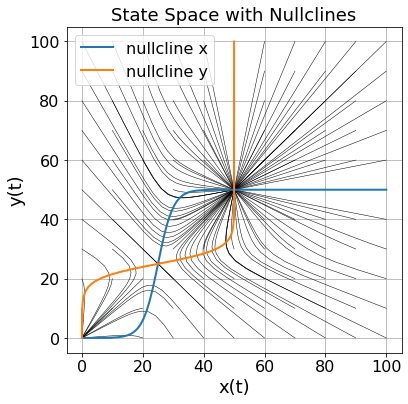

In [456]:
T = 100
dt = 0.1
x0 = 10
y0 = 100
w = 0.4
I = -10

plt.figure(figsize=(6, 6))

# Define the range of values for x0 and y0
x0_values = np.arange(0, 101, 10)
y0_values = np.arange(0, 101, 10)

# Iterate over x0_values and y0_values
for x0 in x0_values:
    for y0 in y0_values:
        _, _, Fx, Fy = mutual(T, dt, x0, y0, w, I)
        plt.plot(Fx, Fy, color='k', linewidth=0.5)

# Define the range of values for x and y
x = np.linspace(0, 100, 100)
y = np.linspace(0, 100, 100)

# Calculate nullclines
nullcline_x = 50 / (1 + np.exp(-w * y - I))
nullcline_y = 50 / (1 + np.exp(-w * x - I))

# Plot nullclines
plt.plot(x, nullcline_x, label='nullcline x', linewidth=2)
plt.plot(nullcline_y, y, label='nullcline y', linewidth=2)

graph(
    rf'State Space with Nullclines',
    'x(t)',
    'y(t)',
    '23_1.pdf',
    tight=False
)

# 2.4

In [184]:
from scipy.optimize import fsolve

w = 0.4
I = 0

def equations(p, w, I):
    x, y = p
    eq1 = x - 50 / (1 + np.exp(-(w * y + I)))
    eq2 = y - 50 / (1 + np.exp(-(w * x + I)))
    return (eq1, eq2)

# Initial guess for x and y
initial_guess = [0, 0]
fixed_points = fsolve(equations, initial_guess, args=(w, I))
print("Fixed Points (x, y):", fixed_points)

initial_guess = [25, 25]
fixed_points = fsolve(equations, initial_guess, args=(w, I))
print("Fixed Points (x, y):", fixed_points)

initial_guess = [50, 50]
fixed_points = fsolve(equations, initial_guess, args=(w, I))
print("Fixed Points (x, y):", fixed_points)


Fixed Points (x, y): [-7.21893382 -7.21893239]
Fixed Points (x, y): [49.9999999 49.9999999]
Fixed Points (x, y): [49.9999999 49.9999999]


# 2.5

# 2.6

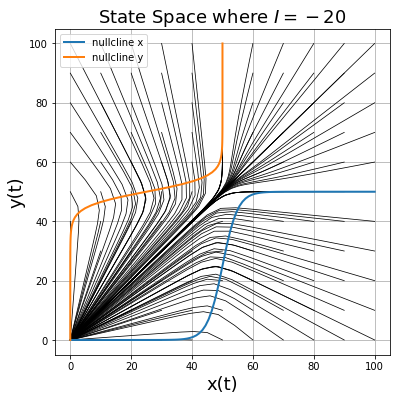

In [207]:
T = 100
dt = 0.1
w = 0.4
I = -20

plt.figure(figsize=(6, 6))

# Define the range of values for x0 and y0
x0_values = np.arange(0, 101, 10)
y0_values = np.arange(0, 101, 10)

# Iterate over x0_values and y0_values
for x0 in x0_values:
    for y0 in y0_values:
        _, _, Fx, Fy = mutual(T, dt, x0, y0, w, I)
        plt.plot(Fx, Fy, color='k', linewidth=0.75)

# Define the range of values for x and y
x = np.linspace(0, 100, 100)
y = np.linspace(0, 100, 100)

# Calculate nullclines
nullcline_x = 50 / (1 + np.exp(-w * y - I))
nullcline_y = 50 / (1 + np.exp(-w * x - I))

# Plot nullclines
plt.plot(x, nullcline_x, label='nullcline x', linewidth=2)
plt.plot(nullcline_y, y, label='nullcline y', linewidth=2)

graph(
    rf'State Space where $I = {I}$',
    r'x(t)',
    r'y(t)',
    '261.pdf',
    tight=False,
    legend=True
)

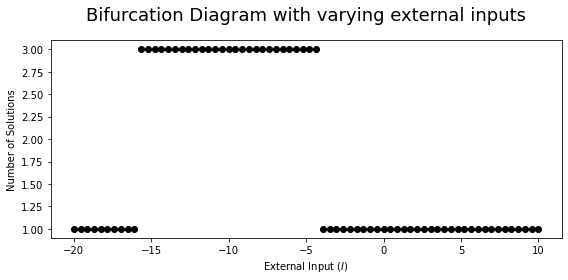

In [208]:
B = np.zeros(70)
Is = np.linspace(-20, 10, 70)

for i, I in enumerate(Is):

    y = np.linspace(0, 51, 52)
    nullcline_x = 50 / (1 + np.exp(-0.4 * y - I))

    # we know that the nullclines diverge at [50, 50]
    # so we can find the number of solutions by calculating
    # how many times the x nullclines crosses the y = x line
    # which is equivalent to intersections with the y nullcline
    differences = y - nullcline_x
    sign_changes = np.diff(np.sign(differences))
    solutions_count = np.sum(sign_changes != 0)
    B[i] = solutions_count 

    # small hack because np.sign counts 0 as an extra sign change
    if I == -10:
        B[i] -= 1




plt.figure(figsize=(8, 4))
plt.scatter(Is, B, color='k')
plt.title(r'Bifurcation Diagram with varying external inputs', fontsize=18, pad=20)
plt.xlabel(r'External Input $(I)$')
plt.ylabel(r'Number of Solutions')
plt.savefig('262.pdf')
plt.tight_layout()
plt.show()

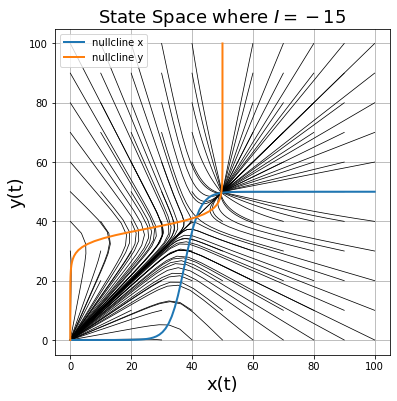

In [209]:
T = 100
dt = 0.1
w = 0.4
I = -15

plt.figure(figsize=(6, 6))

# Define the range of values for x0 and y0
x0_values = np.arange(0, 101, 10)
y0_values = np.arange(0, 101, 10)

# Iterate over x0_values and y0_values
for x0 in x0_values:
    for y0 in y0_values:
        _, _, Fx, Fy = mutual(T, dt, x0, y0, w, I)
        plt.plot(Fx, Fy, color='k', linewidth=0.75)

# Define the range of values for x and y
x = np.linspace(0, 100, 100)
y = np.linspace(0, 100, 100)

# Calculate nullclines
nullcline_x = 50 / (1 + np.exp(-w * y - I))
nullcline_y = 50 / (1 + np.exp(-w * x - I))

# Plot nullclines
plt.plot(x, nullcline_x, label='nullcline x', linewidth=2)
plt.plot(nullcline_y, y, label='nullcline y', linewidth=2)

graph(
    rf'State Space where $I = {I}$',
    r'x(t)',
    r'y(t)',
    '263.pdf',
    tight=False,
    legend=True
)

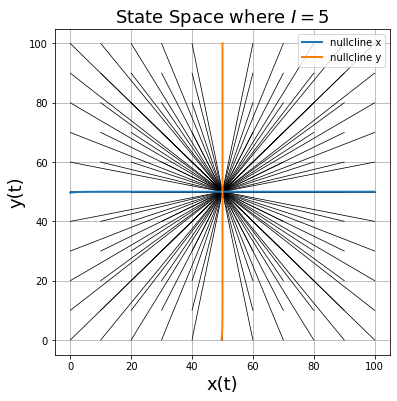

In [210]:
T = 100
dt = 0.1
w = 0.4
I = 5

plt.figure(figsize=(6, 6))

# Define the range of values for x0 and y0
x0_values = np.arange(0, 101, 10)
y0_values = np.arange(0, 101, 10)

# Iterate over x0_values and y0_values
for x0 in x0_values:
    for y0 in y0_values:
        _, _, Fx, Fy = mutual(T, dt, x0, y0, w, I)
        plt.plot(Fx, Fy, color='k', linewidth=0.75)

# Define the range of values for x and y
x = np.linspace(0, 100, 100)
y = np.linspace(0, 100, 100)

# Calculate nullclines
nullcline_x = 50 / (1 + np.exp(-w * y - I))
nullcline_y = 50 / (1 + np.exp(-w * x - I))

# Plot nullclines
plt.plot(x, nullcline_x, label='nullcline x', linewidth=2)
plt.plot(nullcline_y, y, label='nullcline y', linewidth=2)

graph(
    rf'State Space where $I = {I}$',
    r'x(t)',
    r'y(t)',
    '264.pdf',
    tight=False,
    legend=True
)

# 3.1

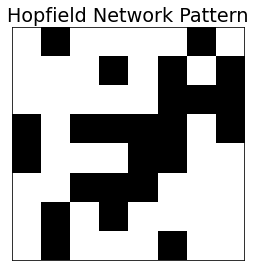

In [478]:
pattern1 = np.random.choice([-1, 1], size=(8, 8))
plt.figure(figsize=(4, 4))
plt.imshow(pattern1, cmap='gray')
plt.title('Hopfield Network Pattern')
plt.xticks([])  # Remove x ticks
plt.yticks([])  # Remove y ticks
plt.tight_layout()
plt.savefig('31.pdf')
plt.show()

# 3.2

In [479]:
# calculate the weight matrix
p = pattern1.reshape(64)
W1 = (1/64) * np.outer(p, p.T)


In [6]:
def hopfield(T, dt, p0, s, W):
    P = [p0]

    for t in range(0, T-1):
        p = P[t]
        noise = s * np.random.normal(0, 1, 64)
        D = -p + np.sign(W @ p) + noise
        P.append(p + D * dt)

    return P

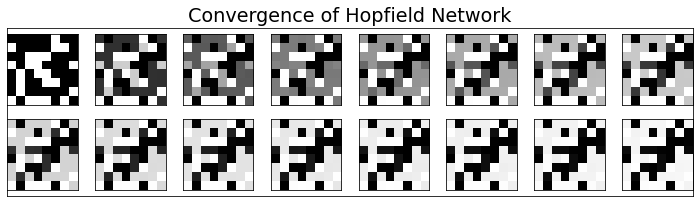

In [481]:
# initial pattern
p0 = np.random.choice([-1, 1], size=(64))

# simulate the hopfield network
T = 350
dt = 0.01
s = 0.1
P = hopfield(T, dt, p0, s, W1)

# plot 16 patterns in 4 x 4 grid
plt.figure(figsize=(10, 3))
plt.title('Convergence of Hopfield Network', fontsize=18)
plt.xticks([])  # Remove x ticks
plt.yticks([])  # Remove y ticks

for i in range(16):
    plt.subplot(2, 8, i+1)
    plt.imshow(P[i * round((T/16))].reshape(8, 8), cmap='gray', interpolation='nearest')
    plt.xticks([])  # Remove x ticks
    plt.yticks([])  # Remove y ticks
plt.tight_layout()
plt.savefig('32.pdf')
plt.show()


# 3.3

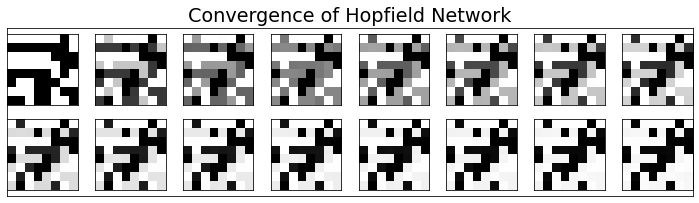

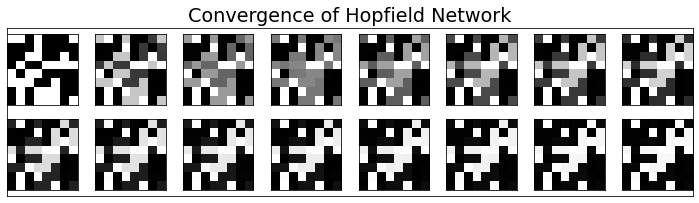

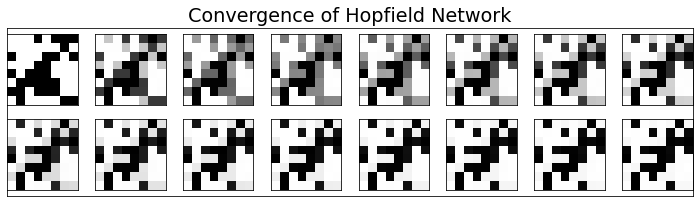

In [482]:
# simulate the hopfield network
T = 400
dt = 0.01
s = 0.1

p0 = np.random.choice([-1, 1], size=(64))
P = hopfield(T, dt, p0, s, W1)
plt.figure(figsize=(10, 3))
plt.title('Convergence of Hopfield Network')
plt.xticks([])  # Remove x ticks
plt.yticks([])  # Remove y ticks
for i in range(16):
    plt.subplot(2, 8, i+1)
    plt.imshow(P[i * round((T/16))].reshape(8, 8), cmap='gray', interpolation='nearest')
    plt.xticks([])  # Remove x ticks
    plt.yticks([])  # Remove y ticks
plt.tight_layout()
plt.savefig('33_1.pdf')
plt.show()

p0 = np.random.choice([-1, 1], size=(64))
P = hopfield(T, dt, p0, s, W1)
plt.figure(figsize=(10, 3))
plt.title('Convergence of Hopfield Network')
plt.xticks([])  # Remove x ticks
plt.yticks([])  # Remove y ticks
for i in range(16):
    plt.subplot(2, 8, i+1)
    plt.imshow(P[i * round((T/16))].reshape(8, 8), cmap='gray', interpolation='nearest')
    plt.xticks([])  # Remove x ticks
    plt.yticks([])  # Remove y ticks
plt.tight_layout()
plt.savefig('33_2.pdf')
plt.show()

p0 = np.random.choice([-1, 1], size=(64))
P = hopfield(T, dt, p0, s, W1)
plt.figure(figsize=(10, 3))
plt.title('Convergence of Hopfield Network')
plt.xticks([])  # Remove x ticks
plt.yticks([])  # Remove y ticks
for i in range(16):
    plt.subplot(2, 8, i+1)
    plt.imshow(P[i * round((T/16))].reshape(8, 8), cmap='gray', interpolation='nearest')
    plt.xticks([])  # Remove x ticks
    plt.yticks([])  # Remove y ticks
plt.tight_layout()
plt.savefig('33_3.pdf')
plt.show()


# 3.4

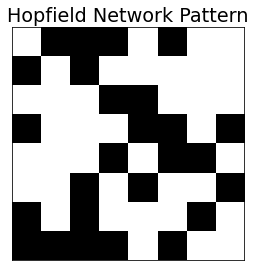

In [483]:
# create second pattern
pattern2 = np.random.choice([-1, 1], size=(8, 8))
plt.figure(figsize=(4, 4))
plt.imshow(pattern2, cmap='gray', interpolation='nearest')
plt.title('Hopfield Network Pattern')
plt.xticks([])  # Remove x ticks
plt.yticks([])  # Remove y ticks
plt.tight_layout()
plt.savefig('34_1.pdf')
plt.show()

In [484]:
# calculate the new weight matrix
p1 = pattern1.reshape(64)
p2 = pattern2.reshape(64)
W2 = (1/64) + (np.outer(p, p.T) + np.outer(p2, p2.T))

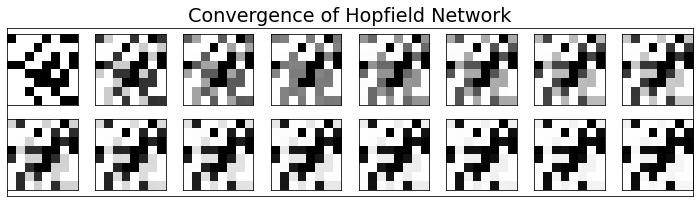

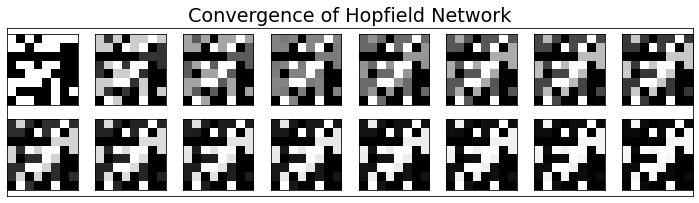

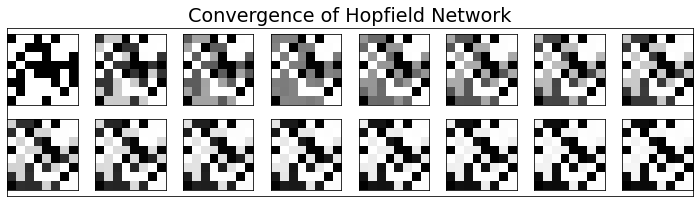

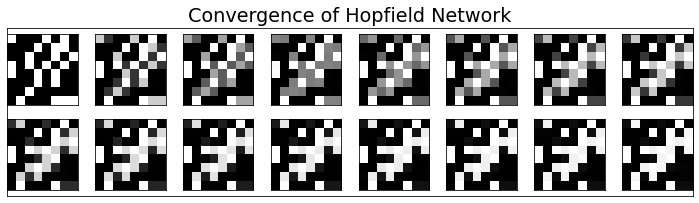

In [485]:
T = 350
dt = 0.01
s = 0.1

p0 = np.random.choice([-1, 1], size=(64))
P = hopfield(T, dt, p0, s, W2)
plt.figure(figsize=(10, 3))
plt.title('Convergence of Hopfield Network')
plt.xticks([])  # Remove x ticks
plt.yticks([])  # Remove y ticks
for i in range(16):
    plt.subplot(2, 8, i+1)
    plt.imshow(P[i * round((T/16))].reshape(8, 8), cmap='gray', interpolation='nearest')
    plt.xticks([])  # Remove x ticks
    plt.yticks([])  # Remove y ticks
plt.tight_layout()
plt.savefig('34_2.pdf')
plt.show()

p0 = np.random.choice([-1, 1], size=(64))
P = hopfield(T, dt, p0, s, W2)
plt.figure(figsize=(10, 3))
plt.title('Convergence of Hopfield Network')
plt.xticks([])  # Remove x ticks
plt.yticks([])  # Remove y ticks
for i in range(16):
    plt.subplot(2, 8, i+1)
    plt.imshow(P[i * round((T/16))].reshape(8, 8), cmap='gray', interpolation='nearest')
    plt.xticks([])  # Remove x ticks
    plt.yticks([])  # Remove y ticks
plt.tight_layout()
plt.savefig('34_3.pdf')
plt.show()

p0 = np.random.choice([-1, 1], size=(64))
P = hopfield(T, dt, p0, s, W2)
plt.figure(figsize=(10, 3))
plt.title('Convergence of Hopfield Network')
plt.xticks([])  # Remove x ticks
plt.yticks([])  # Remove y ticks
for i in range(16):
    plt.subplot(2, 8, i+1)
    plt.imshow(P[i * round((T/16))].reshape(8, 8), cmap='gray', interpolation='nearest')
    plt.xticks([])  # Remove x ticks
    plt.yticks([])  # Remove y ticks
plt.tight_layout()
plt.savefig('34_4.pdf')
plt.show()

p0 = np.random.choice([-1, 1], size=(64))
P = hopfield(T, dt, p0, s, W2)
plt.figure(figsize=(10, 3))
plt.title('Convergence of Hopfield Network')
plt.xticks([])  # Remove x ticks
plt.yticks([])  # Remove y ticks
for i in range(16):
    plt.subplot(2, 8, i+1)
    plt.imshow(P[i * round((T/16))].reshape(8, 8), cmap='gray', interpolation='nearest')
    plt.xticks([])  # Remove x ticks
    plt.yticks([])  # Remove y ticks
plt.tight_layout()
plt.savefig('34_5.pdf')
plt.show()



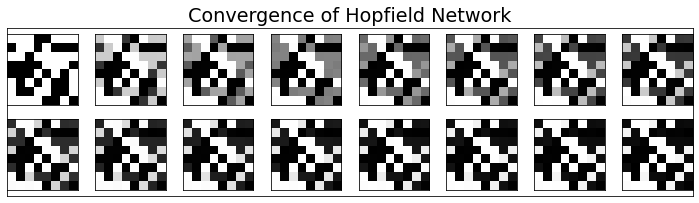

In [498]:
T = 350
dt = 0.01
s = 0.1

p0 = np.random.choice([-1, 1], size=(64))
P = hopfield(T, dt, p0, s, W2)
plt.figure(figsize=(10, 3))
plt.title('Convergence of Hopfield Network')
plt.xticks([])  # Remove x ticks
plt.yticks([])  # Remove y ticks
for i in range(16):
    plt.subplot(2, 8, i+1)
    plt.imshow(P[i * round((T/16))].reshape(8, 8), cmap='gray', interpolation='nearest')
    plt.xticks([])  # Remove x ticks
    plt.yticks([])  # Remove y ticks
plt.tight_layout()
plt.savefig('34_5.pdf')
plt.show()

# 3.5

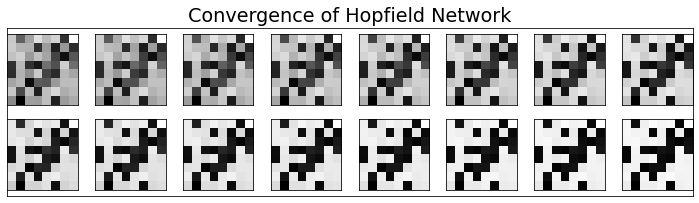

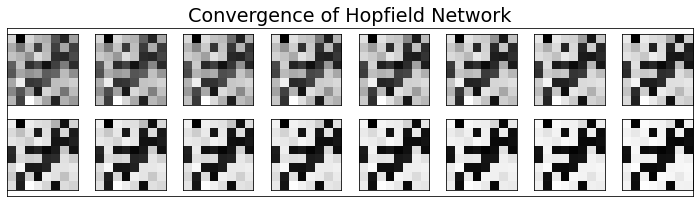

In [491]:
T = 250
dt = 0.01
s = 0.1

# add noise to pattern 1
p0 = pattern1.reshape(64) + (0.5 * np.random.normal(0, 1, 64))
P = hopfield(T, dt, p0, s, W2)
plt.figure(figsize=(10, 3))
plt.title('Convergence of Hopfield Network')
plt.xticks([])  # Remove x ticks
plt.yticks([])  # Remove y ticks
for i in range(16):
    plt.subplot(2, 8, i+1)
    plt.imshow(P[i * round((T/16))].reshape(8, 8), cmap='gray', interpolation='nearest')
    plt.xticks([])  # Remove x ticks
    plt.yticks([])  # Remove y ticks
plt.tight_layout()
plt.savefig('351.pdf')
plt.show()

p0 = pattern1.reshape(64) + (0.5 * np.random.normal(0, 1, 64))
P = hopfield(T, dt, p0, s, W2)
plt.figure(figsize=(10, 3))
plt.title('Convergence of Hopfield Network')
plt.xticks([])  # Remove x ticks
plt.yticks([])  # Remove y ticks
for i in range(16):
    plt.subplot(2, 8, i+1)
    plt.imshow(P[i * round((T/16))].reshape(8, 8), cmap='gray', interpolation='nearest')
    plt.xticks([])  # Remove x ticks
    plt.yticks([])  # Remove y ticks
plt.tight_layout()
plt.savefig('352.pdf')
plt.show()


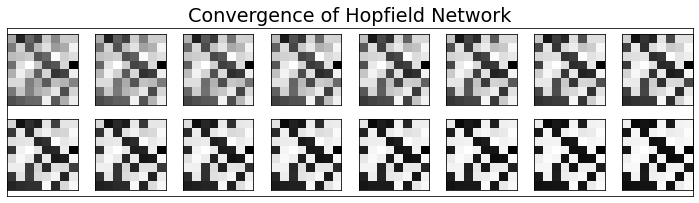

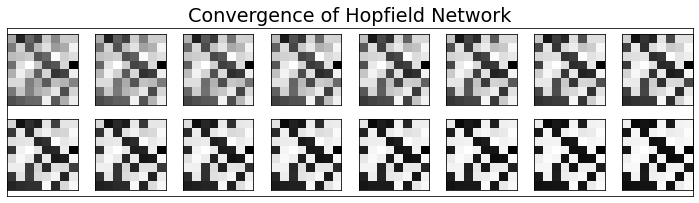

In [492]:
T = 250
dt = 0.01
s = 0.1

# add noise to pattern 2
p0 = pattern2.reshape(64) + (0.5 * np.random.normal(0, 1, 64))
P = hopfield(T, dt, p0, s, W2)
plt.figure(figsize=(10, 3))
plt.title('Convergence of Hopfield Network')
plt.xticks([])  # Remove x ticks
plt.yticks([])  # Remove y ticks
for i in range(16):
    plt.subplot(2, 8, i+1)
    plt.imshow(P[i * round((T/16))].reshape(8, 8), cmap='gray', interpolation='nearest')
    plt.xticks([])  # Remove x ticks
    plt.yticks([])  # Remove y ticks
plt.tight_layout()
plt.savefig('353.pdf')
plt.show()

# add noise to pattern 2
p0 = pattern2.reshape(64) + (0.5 * np.random.normal(0, 1, 64))
plt.figure(figsize=(10, 3))
plt.title('Convergence of Hopfield Network')
plt.xticks([])  # Remove x ticks
plt.yticks([])  # Remove y ticks
for i in range(16):
    plt.subplot(2, 8, i+1)
    plt.imshow(P[i * round((T/16))].reshape(8, 8), cmap='gray', interpolation='nearest')
    plt.xticks([])  # Remove x ticks
    plt.yticks([])  # Remove y ticks
plt.tight_layout()
plt.savefig('354.pdf')
plt.show()

# 3.6

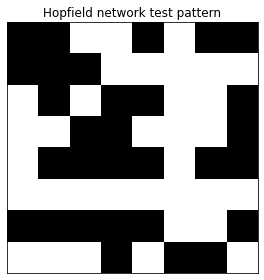

In [15]:
# create second pattern
test_pattern = np.random.choice([-1, 1], size=(8, 8))
plt.figure(figsize=(4, 4))
plt.imshow(test_pattern, cmap='gray', interpolation='nearest')
plt.title('Hopfield network test pattern')
plt.xticks([])  # Remove x ticks
plt.yticks([])  # Remove y ticks
plt.tight_layout()
plt.savefig('361.pdf')
plt.show()

In [16]:
def calculate_w(patterns, test_pattern, N):
    test_pattern = test_pattern.reshape(N)
    W = np.outer(test_pattern, test_pattern.T)
    for p in patterns:
        W += np.outer(p, p.T)
    return W * (1/N)

def generate_p(M):
    patterns = []
    for _ in range(M-1):
        patterns.append(np.random.choice([-1, 1], size=(64)))
    return patterns 

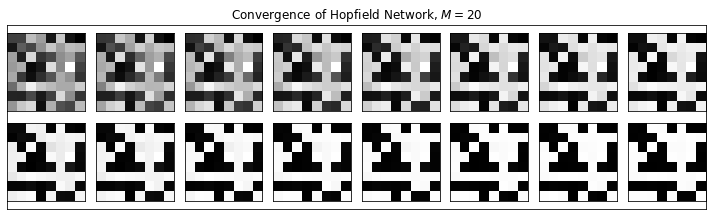

In [35]:
M = 20
N = 64

T = 500
dt = 0.01
s = 0.1

patterns = generate_p(M)
W3 = calculate_w(patterns, test_pattern, 64)

# add noise to pattern 2
p0 = test_pattern.reshape(64) + (0.5 * np.random.normal(0, 1, 64))
P = hopfield(T, dt, p0, s, W3)
plt.figure(figsize=(10, 3))
plt.title(rf'Convergence of Hopfield Network, $M = {M}$')
plt.xticks([])  # Remove x ticks
plt.yticks([])  # Remove y ticks
for i in range(16):
    plt.subplot(2, 8, i+1)
    plt.imshow(P[i * round((T/16))].reshape(8, 8), cmap='gray', interpolation='nearest')
    plt.xticks([])  # Remove x ticks
    plt.yticks([])  # Remove y ticks
plt.tight_layout()
plt.savefig('362.pdf')
plt.show()

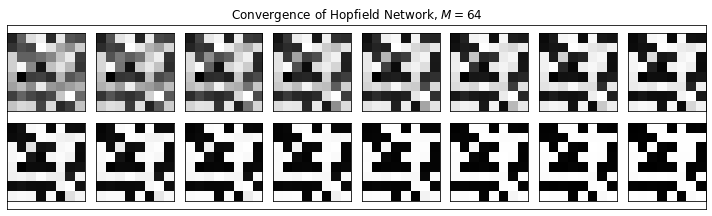

In [36]:
M = 64
N = 64

T = 500
dt = 0.01
s = 0.1

patterns = generate_p(M)
W3 = calculate_w(patterns, test_pattern, 64)

# add noise to pattern 2
p0 = test_pattern.reshape(64) + (0.5 * np.random.normal(0, 1, 64))
P = hopfield(T, dt, p0, s, W3)
plt.figure(figsize=(10, 3))
plt.title(rf'Convergence of Hopfield Network, $M = {M}$')
plt.xticks([])  # Remove x ticks
plt.yticks([])  # Remove y ticks
for i in range(16):
    plt.subplot(2, 8, i+1)
    plt.imshow(P[i * round((T/16))].reshape(8, 8), cmap='gray', interpolation='nearest')
    plt.xticks([])  # Remove x ticks
    plt.yticks([])  # Remove y ticks
plt.tight_layout()
plt.savefig('363.pdf')
plt.show()

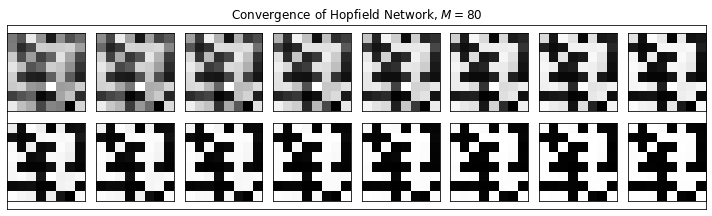

In [46]:
M = 80
N = 64

T = 500
dt = 0.01
s = 0.1

patterns = generate_p(M)
W3 = calculate_w(patterns, test_pattern, 64)

# add noise to pattern 2
p0 = test_pattern.reshape(64) + (0.5 * np.random.normal(0, 1, 64))
P = hopfield(T, dt, p0, s, W3)
plt.figure(figsize=(10, 3))
plt.title(rf'Convergence of Hopfield Network, $M = {M}$')
plt.xticks([])  # Remove x ticks
plt.yticks([])  # Remove y ticks
for i in range(16):
    plt.subplot(2, 8, i+1)
    plt.imshow(P[i * round((T/16))].reshape(8, 8), cmap='gray', interpolation='nearest')
    plt.xticks([])  # Remove x ticks
    plt.yticks([])  # Remove y ticks
plt.tight_layout()
plt.savefig('364.pdf')
plt.show()

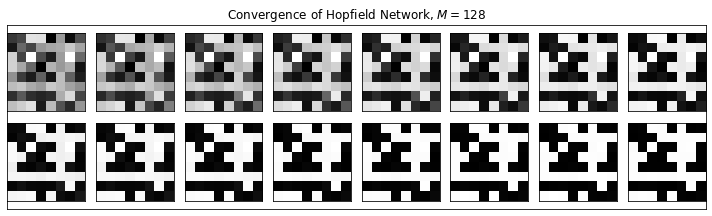

In [44]:
M = 128
N = 64

T = 500
dt = 0.01
s = 0.1

patterns = generate_p(M)
W3 = calculate_w(patterns, test_pattern, 64)

# add noise to pattern 2
p0 = test_pattern.reshape(64) + (0.5 * np.random.normal(0, 1, 64))
P = hopfield(T, dt, p0, s, W3)
plt.figure(figsize=(10, 3))
plt.title(rf'Convergence of Hopfield Network, $M = {M}$')
plt.xticks([])  # Remove x ticks
plt.yticks([])  # Remove y ticks
for i in range(16):
    plt.subplot(2, 8, i+1)
    plt.imshow(P[i * round((T/16))].reshape(8, 8), cmap='gray', interpolation='nearest')
    plt.xticks([])  # Remove x ticks
    plt.yticks([])  # Remove y ticks
plt.tight_layout()
plt.savefig('365.pdf')
plt.show()

# 4.1

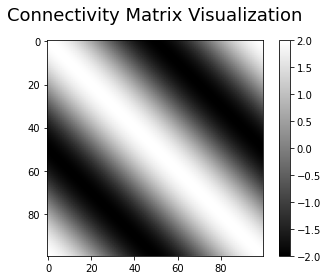

In [83]:
N = 100
theta = np.linspace(0, 2*np.pi, N, endpoint=False)  # Generate N angles from 0 to 2*pi

# initialize the connectivity matrix J
J = np.zeros((N, N))

# compute the connectivity matrix
for i in range(N):
    for j in range(N):
        J[i, j] = 2 * np.cos(theta[i] - theta[j])

# visualize the matrix
plt.figure(figsize=(5,4))
plt.imshow(J, cmap='grey')
plt.colorbar()
plt.title('Connectivity Matrix Visualization', fontsize=18, pad=20)
plt.tight_layout()
plt.savefig('41.pdf')
plt.show()

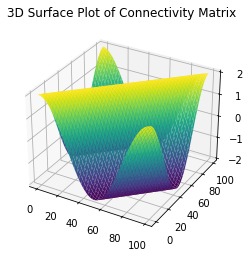

In [84]:
X, Y = np.meshgrid(np.arange(N), np.arange(N))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, J, cmap='viridis')
ax.set_title('3D Surface Plot of Connectivity Matrix')
plt.show()

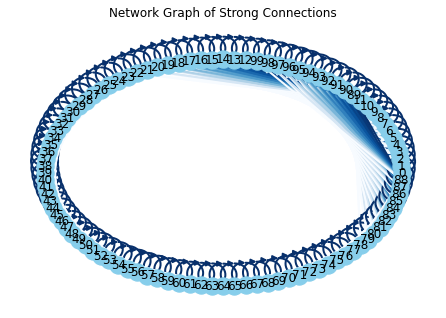

In [85]:
import networkx as nx

# Threshold to keep only strong connections for clarity
threshold = 1.5  # Example threshold, adjust based on specific needs
G = nx.DiGraph()
for i in range(N):
    for j in range(N):
        if J[i, j] > threshold:
            G.add_edge(i, j, weight=J[i, j])

pos = nx.circular_layout(G)  # Position nodes in a circle
weights = np.array([G[u][v]['weight'] for u, v in G.edges()])
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color=weights, width=2, edge_cmap=plt.cm.Blues)
plt.title('Network Graph of Strong Connections')
plt.show()

# 4.2

In [86]:
def ring(T, dt, J, x0):
    X = [x0]

    for t in range(0, T-1):
        dx = -X[t] + J @ np.tanh(X[t])
        X.append(X[t] + dx * dt)
    
    return X

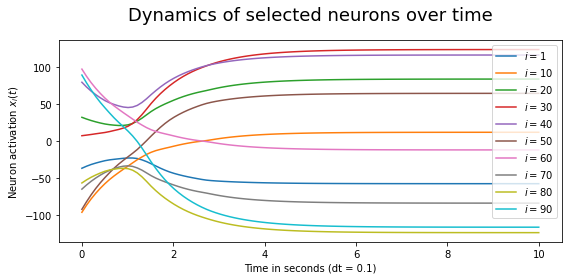

In [103]:
N = 100
T = 100
dt = 0.1

# generate random initial state
x0 = np.random.uniform(-100, 100, size=N)

X = ring(T, dt, J, x0)
X = np.array(X)

x = np.linspace(0, T*dt, T)

plt.figure(figsize=(8, 4))


# Plot a subset of the neurons
for i in [1, 10, 20, 30, 40, 50, 60, 70, 80, 90]:
    plt.plot(x, X[:, i], label=rf'$i = {i}$')

plt.xlabel('Time in seconds (dt = 0.1)')
plt.ylabel(r'Neuron activation $x_i(t)$')
plt.title('Dynamics of selected neurons over time', fontsize=18, pad=20)
plt.legend()
plt.tight_layout()
plt.savefig('42.pdf')
plt.show()

#

# 4.3

(100, 1000)


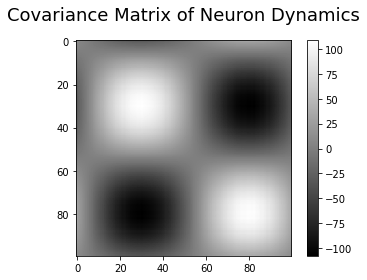

In [90]:
T = 1000
dt = 0.1 
x0 = np.random.randn(N)
X = ring(T, dt, J, x0)
X = np.array(X)

# reformat activations matrix for PCA
X = X.T

print(X.shape)

# normalize matrix by subtracting the mean
X = X - np.mean(X, axis=1)[:, np.newaxis]

# compute covariance matrix
C = (1/T) * X @ X.T

plt.figure(figsize=(5,4))
plt.imshow(C, cmap='grey')
plt.colorbar()
plt.title('Covariance Matrix of Neuron Dynamics', fontsize=18, pad=20)
plt.tight_layout()
plt.savefig('43.pdf')
plt.show()


In [91]:
evals, evecs = np.linalg.eig(C)

# Sort eigenvalues and eigenvectors by decreasing eigenvalues
indices = np.argsort(evals)[::-1]
evals = evals[indices]
evecs = evecs[:, indices]

# Calculate variance explained by first principal component
total_variance = sum(evals)
explained_variance = (evals / total_variance).real
print("Variance explained by the first principal component:", explained_variance[0])

Variance explained by the first principal component: 0.9999695954234212


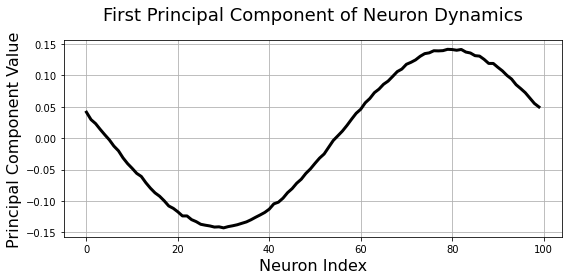

In [107]:
first_pc = evecs[:, 0].real

plt.figure(figsize=(8, 4))
plt.plot(first_pc, color='k', linewidth=3)
plt.title('First Principal Component of Neuron Dynamics', fontsize=18, pad=20)
plt.xlabel('Neuron Index', fontsize=16)
plt.ylabel('Principal Component Value', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig('43_2.pdf')
plt.show()

# 4.4

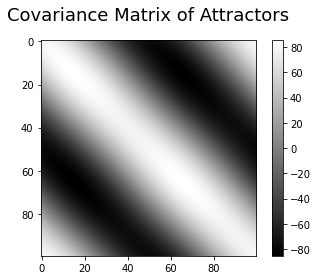

In [112]:
N = 100
T = 1000
dt = 0.1
M = 500

Q = np.zeros((N, M))

for i in range(M):
    x0 = np.random.uniform(-100, 100, size=N)
    X = ring(T, dt, J, x0)
    Q[:, i] = X[-1]

# To visualize it, perform a PCA on the set of attractors Q
C = (1/ (M * N)) * Q @ Q.T

# Plot the covariance matrix
plt.figure(figsize=(5,4))
plt.imshow(C, cmap='grey')
plt.colorbar()
plt.title('Covariance Matrix of Attractors', fontsize=18, pad=20)
plt.tight_layout()
plt.savefig('441.pdf')
plt.show()

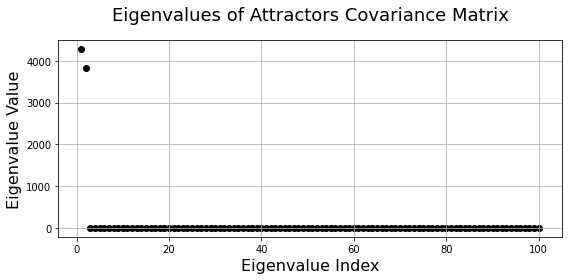

In [117]:
# Get the eigenvalues and eigenvectors
evals, evecs = np.linalg.eig(C)

# Sort eigenvalues and eigenvectors
indices = np.argsort(evals)[::-1]
evals = evals[indices]
evecs = evecs[:, indices]

x = np.linspace(1, N, N)

# Plot the eigenvalues
plt.figure(figsize=(8, 4))
plt.scatter(x, evals.real, color='k')
plt.title('Eigenvalues of Attractors Covariance Matrix', fontsize=18, pad=20)
plt.xlabel('Eigenvalue Index', fontsize=16)
plt.ylabel('Eigenvalue Value', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig('442.pdf')
plt.show()

In [115]:
# calculate explained variance of the first 5 PCs
total_variance = sum(evals)
explained_variance = (evals / total_variance).real

# variance explained by the first 10 principal components:
print(explained_variance[:10])


[5.27007157e-01 4.72992843e-01 6.01580932e-17 5.29701691e-17
 5.10692867e-17 4.16929750e-17 2.84599559e-17 2.61154082e-17
 2.45267718e-17 2.14602359e-17]


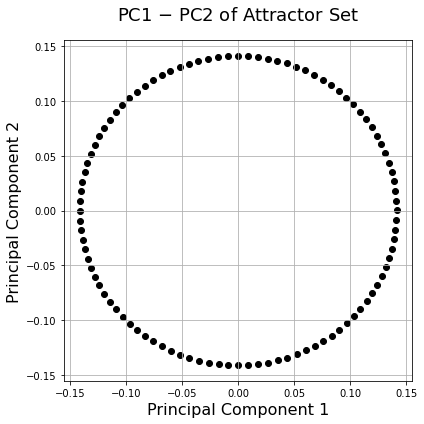

In [127]:
PC1 = evecs[:, 0].real
PC2 = evecs[:, 1].real

plt.figure(figsize=(6, 6))
plt.scatter(PC1, PC2, color='k')
plt.title(r'PC1 $\minus$ PC2 of Attractor Set', fontsize=18, pad=20)
plt.xlabel('Principal Component 1', fontsize=16)
plt.ylabel('Principal Component 2', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig('443.pdf')
plt.show()


# 4.5

Explained variance by the first 2 principal components: [0.52717955 0.47282045]


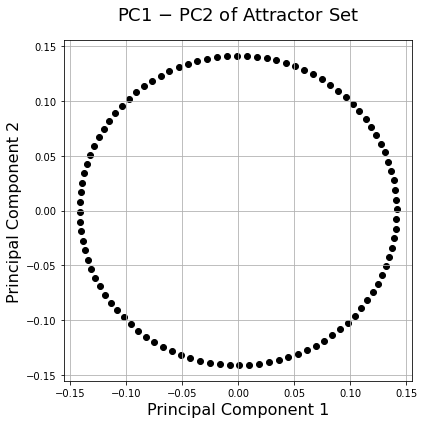

In [130]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(Q.T)

print("Explained variance by the first 2 principal components:", pca.explained_variance_ratio_)

plt.figure(figsize=(6, 6))
plt.scatter(pca.components_[0], pca.components_[1], color='k')
plt.title(r'PC1 $\minus$ PC2 of Attractor Set', fontsize=18, pad=20)
plt.xlabel('Principal Component 1', fontsize=16)
plt.ylabel('Principal Component 2', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig('45.pdf')
plt.show()